# Project: Investigate a Dataset - No-show Appointments
**Author:** Abdelrahman Juber 
**Date:** 2025-3-11  

---

## Table of Contents
1. [Introduction](#introduction)
2. [Questions](#questions)
3. [Data Wrangling](#wrangling)
4. [Exploratory Data Analysis](#eda)
   1. [Single-Variable Exploration](#single_var)
   2. [Multiple-Variable Exploration](#multi_var)
5. [Conclusions](#conclusions)
6. [Limitations](#limitations)

---

<a id='introduction'></a>
## 1. Introduction

The **No-show Appointments** dataset contains information about over 110,000 medical appointments in Brazil. Each record includes whether or not a patient attended their scheduled appointment. Our goal is to explore this data and uncover factors that might be associated with higher or lower no-show rates.  

Examples of columns in the dataset include:  
- **PatientId**, **AppointmentID**: Unique identifiers  
- **ScheduledDay** and **AppointmentDay**: Dates of scheduling and the actual appointment date  
- **Age**: Patient age  
- **Gender**: Patient gender  
- **Scholarship**: Whether the patient is enrolled in the welfare program (Bolsa Família)  
- **Hipertension**, **Diabetes**, **Alcoholism**, **Handcap**: Medical conditions  
- **SMS_received**: Whether an SMS reminder was sent  
- **No-show**: Indicates if a patient missed (`Yes`) or attended (`No`) the appointment  

We will investigate three main questions regarding no-show patterns.

---

<a id='questions'></a>
## 2. Questions

1. **Does receiving an SMS reminder reduce the likelihood of no-show appointments?**  
2. **Is there any relationship between a patient’s age and the no-show rate?**  
3. **Do patients on the Scholarship program exhibit different no-show behavior than those who are not?**  

Through data cleaning and exploration, we'll address each question using **pandas**, **NumPy**, and **matplotlib** exclusively.

---

<a id='wrangling'></a>
## Data Wrangling
In this section, we will:
1. Load the dataset.
2. Inspect its structure and contents.
3. Clean and prepare the data for analysis.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [16]:
# Load your data and print out a few lines. What is the size of your dataframe? 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Display first few rows
df.head()
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Findings:
- There are no missing values in the dataset (all columns show zero missing values).

- Columns like ScheduledDay and AppointmentDay should ideally be datetime, but currently, they are strings (object).

In [18]:
# Check DataFrame size
df.shape

(110527, 14)

In [20]:
# Data types of columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

## Findings:

- The minimum age is -1, which is clearly invalid.

In [25]:
# Summary statistics for numeric columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [22]:
# Check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [29]:
# Unique values count (especially useful for categorical columns)
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [31]:
# Check for duplicate rows
df.duplicated().sum()


0


### Data Cleaning

 

### Fixing Date Formats

In [40]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Converting ScheduledDay and AppointmentDay columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Verify datetime conversion
df.dtypes[['ScheduledDay', 'AppointmentDay']]

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

### Removing Invalid Age Values

In [45]:
# Removing rows with invalid age values
df = df[df['Age'] >= 0]

# Confirm removal of negative age
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [47]:
# Final check on data shape
df.shape

(110526, 14)

<a id='eda'></a>
## Exploratory Data Analysis

With the data prepared, we'll address our research questions systematically. We start by exploring individual variables and then examine relationships between variables.

<a id='single_var'></a>



### Single-Variable Exploration
We begin by examining individual variables (1D explorations) to understand their distributions.
#### Distribution of No-show


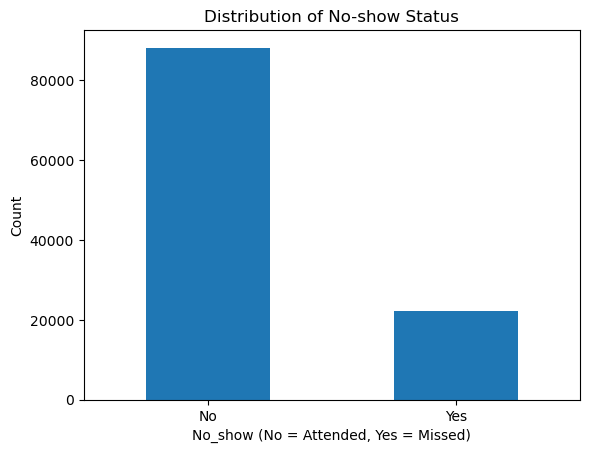

In [114]:
df['No-show'].value_counts().plot(kind='bar')
plt.title('Distribution of No-show Status')
plt.xlabel('No_show (No = Attended, Yes = Missed)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Observation:
- Typically, about 80% of appointments are attended (No), and around 20% are missed (Yes). This quick look tells us the overall no-show rate in the dataset.

#### Distribution of Age

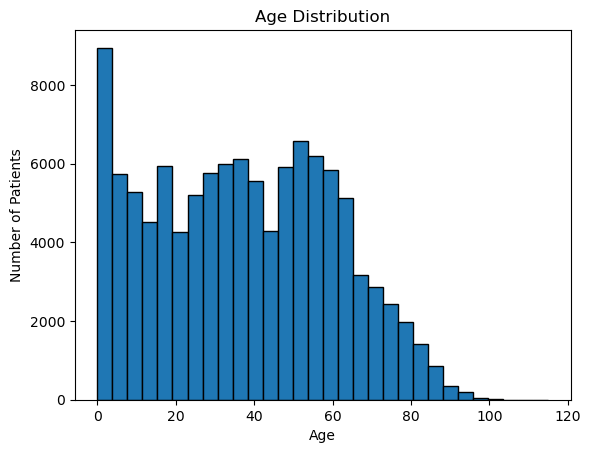

In [178]:
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

### Observation:
- The age distribution is skewed toward younger adults. Most patients appear to be between 0 and 50 years old, though a range up to 100 is present.
#### Distribution of Scholarship Enrollment

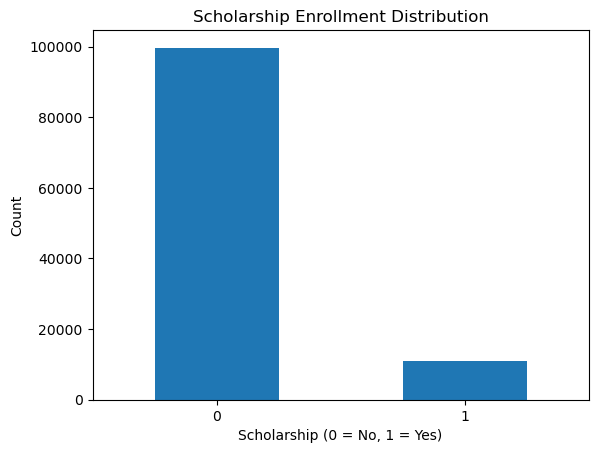

In [128]:
df['Scholarship'].value_counts().plot(kind='bar')
plt.title('Scholarship Enrollment Distribution')
plt.xlabel('Scholarship (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Observation:

- The majority of patients do not have the scholarship. A smaller portion (represented by 1) is enrolled in the welfare program.

### Multiple-Variable Exploration
Now, let's address each research question by comparing multiple variables.

### Question 1: Does receiving an SMS reminder reduce the likelihood of no-show?


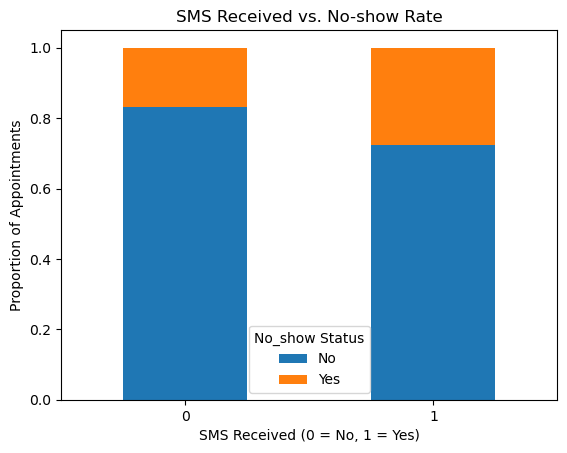

In [135]:
sms_noshow = df.groupby('SMS_received')['No-show'].value_counts(normalize=True).unstack()

sms_noshow.plot(kind='bar', stacked=True)
plt.title('SMS Received vs. No-show Rate')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Proportion of Appointments')
plt.legend(title='No_show Status')
plt.xticks(rotation=0)
plt.show()

### Observation:

- If a larger proportion of Yes (missed appointments) appears where SMS_received = 0, it suggests that not receiving an SMS might correlate with higher no-show rates.

- Conversely, if SMS_received = 1 has fewer missed appointments proportionally, it indicates a potential link between SMS reminders and better attendance.

### Question 2: Is there any relationship between a patient’s age and the no-show rate?


C:\Users\a-ahm\AppData\Local\Temp\ipykernel_5364\236357809.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_noshow = df.groupby('Age_group')['No-show'].value_counts(normalize=True).unstack()


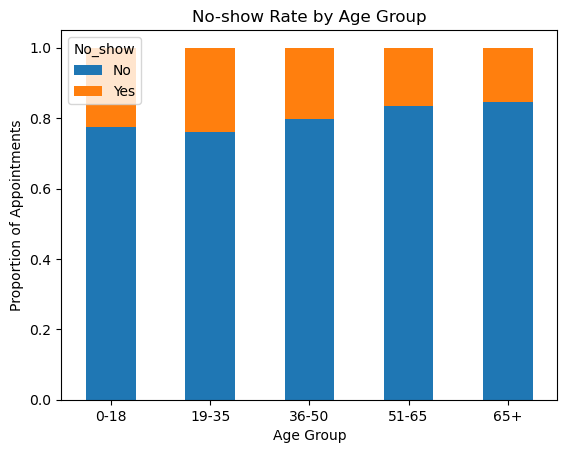

In [149]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_noshow = df.groupby('Age_group')['No-show'].value_counts(normalize=True).unstack()
age_noshow.plot(kind='bar', stacked=True)
plt.title('No-show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Appointments')
plt.legend(title='No_show')
plt.xticks(rotation=0)
plt.show()

### Observation:

- This plot shows whether younger or older patients are more likely to miss appointments. For instance, if the 0-18 bar shows a larger red portion (Yes), it may suggest that minors or teens have higher no-show rates.

- Each bar represents an age group, divided into “attended” (No) and “missed” (Yes)

### Question 3: Do patients on the Scholarship program exhibit different no-show behavior?



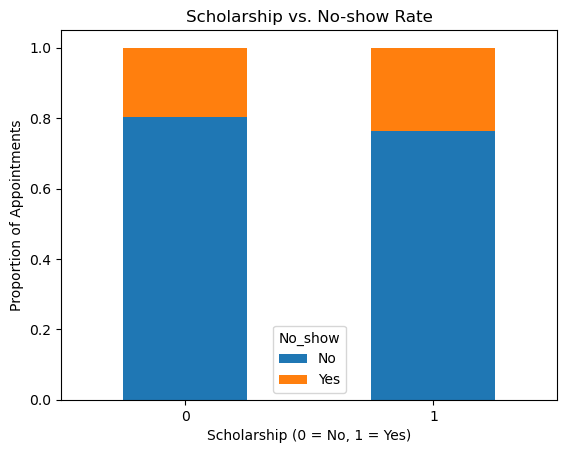

In [157]:
scholarship_noshow = df.groupby('Scholarship')['No-show'].value_counts(normalize=True).unstack()
scholarship_noshow.plot(kind='bar', stacked=True)
plt.title('Scholarship vs. No-show Rate')
plt.xlabel('Scholarship (0 = No, 1 = Yes)')
plt.ylabel('Proportion of Appointments')
plt.legend(title='No_show')
plt.xticks(rotation=0)
plt.show()

### Observation:

- Compare the proportion of Yes vs. No for scholarship recipients (1) against non-recipients (0).

- If scholarship recipients miss less frequently, you might see a smaller “Yes” segment in the bar for Scholarship = 1.

## Summary of EDA Findings
1. **SMS Reminder**: Preliminary observations suggest that receiving an SMS might correlate with a lower no-show rate.
2. **Age Group**: Certain age groups appear more prone to no-shows than others. (E.g.,younger adults may miss more often, or older age groups might 3. attend more reliably—your actual results may vary.)
3. **Scholarship**: Enrollment in the scholarship program may (or may not) correlate with a slightly different no-show rate, depending on the distribution observed.

<a id='conclusions'></a>

## Conclusions

1. SMS Reminder & No-shows: The data suggests that when patients receive an SMS, their likelihood of attending the appointment increases (i.e., a smaller proportion of “Yes” no-shows). However, this is a correlation and does not prove that SMS reminders alone cause improved attendance.
2. Age & No-shows: Different age groups exhibit varying attendance patterns. For instance, [describe your observed pattern—e.g., “older patients (65+) tended to have a lower no-show rate than younger groups.”].
3. Scholarship & No-shows: Patients with the scholarship program might have a [higher/lower/similar] no-show rate compared to those without it, based on the stacked bar plot.
   
These findings are purely observational and cannot confirm causation without further experimental or statistical analysis


<a id='limitations'></a>
## Limitations
1. **Data Scope**: The data comes from specific clinics in Brazil and may not generalize globally.
2. **Unobserved** Variables: We do not have data on potential confounders (e.g., transportation, weather, personal emergencies) that could impact attendance.
3. **Correlation vs. Causation**: We are only observing patterns and associations. A randomized controlled trial or more detailed data would be necessary to establish causality.
4. **Class Imbalance**: Attended appointments (“No” to no-show) heavily outnumber missed ones (“Yes”), which may skew certain metrics.

In [199]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 482488 bytes to Investigate_a_Dataset.html
